Import the package.

In [1]:
import stock_model

Apply stock_model class to a variable.

In [2]:
template = stock_model.stock_model()

Report parameters and get explaination.

In [3]:
template.para()

ticker: SPY
start: 1990-01-01
end: 2019-11-15
task_type: classification
target: return
model_type: sk
model_name: rf
test_size: 0.05
lag: 50
ta: False
normalization: True
drift_include: False
commission: 0.0


In [4]:
template.para_explain()

ticker: ticker of the asset, default SPY. string
start: start time of data, default 1990-01-01. string
end: end time of data, default 2019-11-15. string
task_type: task type, either classification or regression, default classification. string
target: target feature of modeling, if model_name = "tf" use "price", default return. string
model_type: whether model in sklearn or tensorflow, default sk, can change to tf. string
model_name: abbreviated name of the model, default rf, for sk, can choose lasso, ridge, knn, rf(random forest), adb(adaboosting), for tf, can choose mlp, rnn, cnn. string
test_size: split proportion of the test set, default 0.05. float
lag: time lag to consider for the model, default 50. int
ta: whether to add technical tickers for the data, RSI, MACD, ADX, Bollinger Band, default False. bool
normalization: whether apply normalization for the data, default True. bool
drift_include: whether to include drift for r2_base score , default False. bool
commission: commission 

In [5]:
template.para_explain(['ticker','lag'])

ticker: ticker of the asset, default SPY. string
lag: time lag to consider for the model, default 50. int


Change parameters.

In [6]:
template.ticker = 'aapl'

In [7]:
template.para_change({'ticker':'aapl','task_type':'reg','target':'return','normalization':False})

In [8]:
template.para()

ticker: aapl
start: 1990-01-01
end: 2019-11-15
task_type: reg
target: return
model_type: sk
model_name: rf
test_size: 0.05
lag: 50
ta: False
normalization: False
drift_include: False
commission: 0.0


Getting and processing the data.

In [9]:
template.target = 'price'
template.data_prepare()

[*********************100%***********************]  1 of 1 completed


Descriptive analysis of the data.

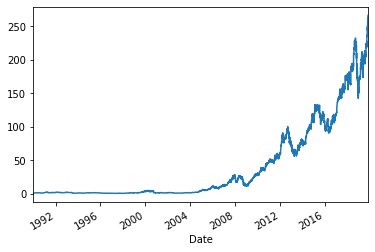

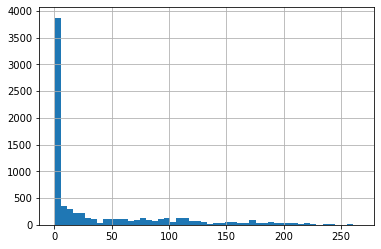

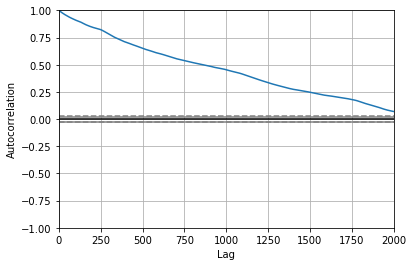

In [10]:
template.plot_all(lag = 2000, ran = 1)

In [11]:
template.analyze_raw()

,ticker,start,end,days,low,high,now,annual_return,total_return
0,aapl,1990-01-03 00:00:00,2019-11-15 00:00:00,7528,0.462054,265.76,265.76,0.193219,195.823


Build the model.

In [12]:
template.model_build_sk(model_para='n_jobs = -1')

Train the model.

In [13]:
template.model_train_sk()

c:\users\zfan2\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Evaluate the model.

In [14]:
template.score_analyze()

,ticker,model_name,accuracy,r2,r2_base,realized_total_return,total_return,annual_return
0,aapl,rf,0.550532,-6.832646,0.979166,0.413617,0.416405,0.261999


Plot the model prediction.

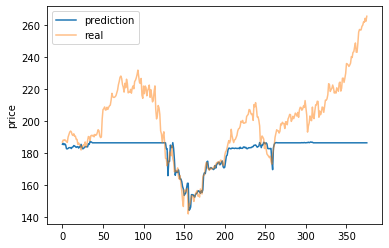

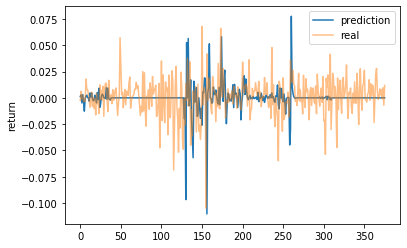

In [15]:
template.score_plot_prediction()
template.score_plot_return()

Quick Version

In [16]:
import stock_model
template = stock_model.stock_model()
template.para_change({'ticker':'dia','task_type':'classification','target':'return','model_name':'rnn','model_type':'tf'})
template.para()

ticker: dia
start: 1990-01-01
end: 2019-11-15
task_type: classification
target: return
model_type: tf
model_name: rnn
test_size: 0.05
lag: 50
ta: False
normalization: True
drift_include: False
commission: 0.0


[*********************100%***********************]  1 of 1 completed


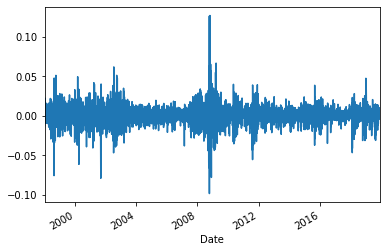

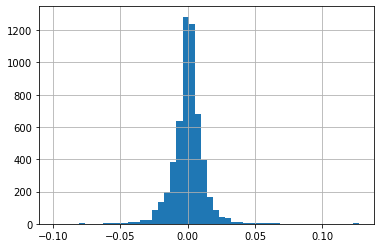

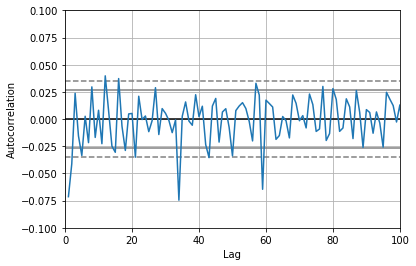

In [17]:
template.data_prepare()
template.plot_all()

In [18]:
template.model_build_tf(number_layer = 2, width = 50)
template.model_train_tf(epoch = 10, batch_size = 64)
template.score_analyze()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
5168/5168 [==============================] - 15s 3ms/sample - loss: 0.7158 - acc: 0.5064
Epoch 2/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.6999 - acc: 0.51241s - loss: 0.6986 - 
Epoch 3/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.7002 - acc: 0.5155
Epoch 4/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.6985 - acc: 0.50432s - loss: 0.6990 -
Epoch 5/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.6955 - acc: 0.51929s - loss: 0.6 - 
Epoch 6/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.6958 - acc: 0.5037
Epoch 7/10
5168/5168 [==============================] - 14s 3ms/sample - loss: 0.6956 - acc: 0.5130
Epoch 8/10
5168/5168 [==========

,ticker,model_name,accuracy,auc,realized_total_return,total_return,annual_return
0,dia,rnn,0.556364,0.482749,0.107051,0.109376,0.0997871
